# Anemia Prediction

## 1.Problem Statement - Predicting the Anemia Type based on Complete Blood Count(CBC) data.

### About Data
- CBC (Complete Blood Count) data is a set of laboratory test results that provide important information about the blood's cellular components.
-  It is commonly used in medical diagnostics, including the identification of anemia types.
#### Key Components of CBC Data
- HGB: The amount of hemoglobin in the blood, crucial for oxygen transport.
- PlT: The number of platelets in the blood, involved in blood clotting,abnormalities can suggest bleeding disorders.
- RBC: The count of red blood cells, responsible for oxygen transport.
- WBC: The count of white blood cells, vital for immune response, which may be elevated due to infections or inflammation.
- MCV (Mean Corpuscular Volume): Average volume of a single red blood cell.
- MCH (Mean Corpuscular Hemoglobin): Average amount of hemoglobin per red blood cell.
- MCHC (Mean Corpuscular Hemoglobin Concentration): Average concentration of hemoglobin in red blood cells.
- PDW: a measurement of the variability in platelet size distribution in the blood
- PCT: A procalcitonin test can help your health care provider diagnose if you have sepsis from a bacterial infection or if you have a high risk of developing sepsis.
- LYMp: Lymphocyte Percentage,the percentage of white blood cells that are lymphocytes (a type of WBC important for immune response).
- NEUTp: Neutrophil Percentage,The percentage of neutrophils, which are the most abundant type of WBC and help fight bacterial infections.
- LYMn :Lymphocyte Number or Absolute Lymphocyte Count,the absolute count of lymphocytes in the blood (usually measured in cells per microliter).
- NEUTn: Neutrophil Number or Absolute Neutrophil Count - ANC,the absolute count of neutrophils in the blood.



### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report

In [3]:
import warnings
warnings.filterwarnings("ignore")

## 2.Import Data
- Data is collected from Kaggle website.

In [6]:
data = pd.read_csv(r"C:\Users\91912\Downloads\archive (1)\diagnosed_cbc_data_v4.csv")

In [8]:
datac = data.copy()

## 3.Simple EDA

### 3.1 Inspecting Dataframe Structure

In [12]:
datac.shape

(1281, 15)

In [14]:
datac.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


### 3.2 Inspecting DataFrame Content

In [17]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


In [19]:
datac.describe()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT
count,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.0000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000
mean,7.862717,25.845000,77.511000,1.880760,5.140940,4.708267,12.184551,46.1526,85.793919,32.084840,31.739149,229.981421,14.312512,0.260280
std,3.564466,7.038728,147.746273,1.335689,2.872294,2.817200,3.812897,104.8861,27.177663,111.170756,3.300352,93.019336,3.005079,0.685351
min,0.800000,6.200000,0.700000,0.200000,0.500000,1.360000,-10.000000,2.0000,-79.300000,10.900000,11.500000,10.000000,8.400000,0.010000
25%,6.000000,25.845000,71.100000,1.880760,5.100000,4.190000,10.800000,39.2000,81.200000,25.500000,30.600000,157.000000,13.300000,0.170000
50%,7.400000,25.845000,77.511000,1.880760,5.140940,4.600000,12.300000,46.1526,86.600000,27.800000,32.000000,213.000000,14.312512,0.260280
75%,8.680000,25.845000,77.511000,1.880760,5.140940,5.100000,13.500000,46.1526,90.200000,29.600000,32.900000,293.000000,14.700000,0.260280
max,45.700000,91.400000,5317.000000,41.800000,79.000000,90.800000,87.100000,3715.0000,990.000000,3117.000000,92.800000,660.000000,97.000000,13.600000


#### 3.2.1.Checking for null values

In [22]:
datac.isnull().sum()

WBC          0
LYMp         0
NEUTp        0
LYMn         0
NEUTn        0
RBC          0
HGB          0
HCT          0
MCV          0
MCH          0
MCHC         0
PLT          0
PDW          0
PCT          0
Diagnosis    0
dtype: int64

#### 3.2.2.Checking for duplicates

In [25]:
datac.duplicated().sum()

49

In [27]:
datac[datac.duplicated()]

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
202,5.60,35.600,56.900,2.00000,3.20000,4.31,11.0,36.3000,84.3,25.5,30.3,171.0,13.100000,0.15000,Normocytic hypochromic anemia
215,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,29.2,180.0,12.500000,0.16000,Normocytic hypochromic anemia
247,5.40,27.800,65.800,1.50000,3.60000,4.45,11.3,37.4000,84.2,25.3,30.2,166.0,13.600000,0.15000,Normocytic hypochromic anemia
269,5.90,16.200,78.400,1.00000,4.60000,4.27,11.3,36.5000,85.7,26.4,30.9,155.0,13.100000,0.15000,Normocytic hypochromic anemia
405,8.70,7.300,85.800,0.60000,7.50000,4.44,12.9,39.6000,89.3,29.0,32.5,140.0,11.300000,0.12000,Normocytic normochromic anemia
406,8.30,20.000,70.300,1.70000,5.80000,5.59,10.0,34.7000,62.1,17.8,28.8,203.0,12.800000,0.17000,Iron deficiency anemia
407,5.40,11.300,81.600,0.60000,4.40000,3.72,9.8,32.1000,86.4,26.3,30.5,125.0,12.000000,0.11000,Normocytic hypochromic anemia
411,8.70,7.300,85.800,0.60000,7.50000,4.44,12.9,39.6000,89.3,29.0,32.5,140.0,11.300000,0.12000,Normocytic normochromic anemia
439,8.50,19.600,71.500,1.70000,6.00000,3.59,8.7,28.5000,79.5,24.2,30.5,122.0,11.300000,0.10000,Iron deficiency anemia
441,3.20,35.600,56.200,1.10000,1.80000,5.22,14.9,45.8000,87.8,28.5,32.5,132.0,14.300000,0.13000,Thrombocytopenia


#### 3.3.3.Checking for Outliers

<Axes: >

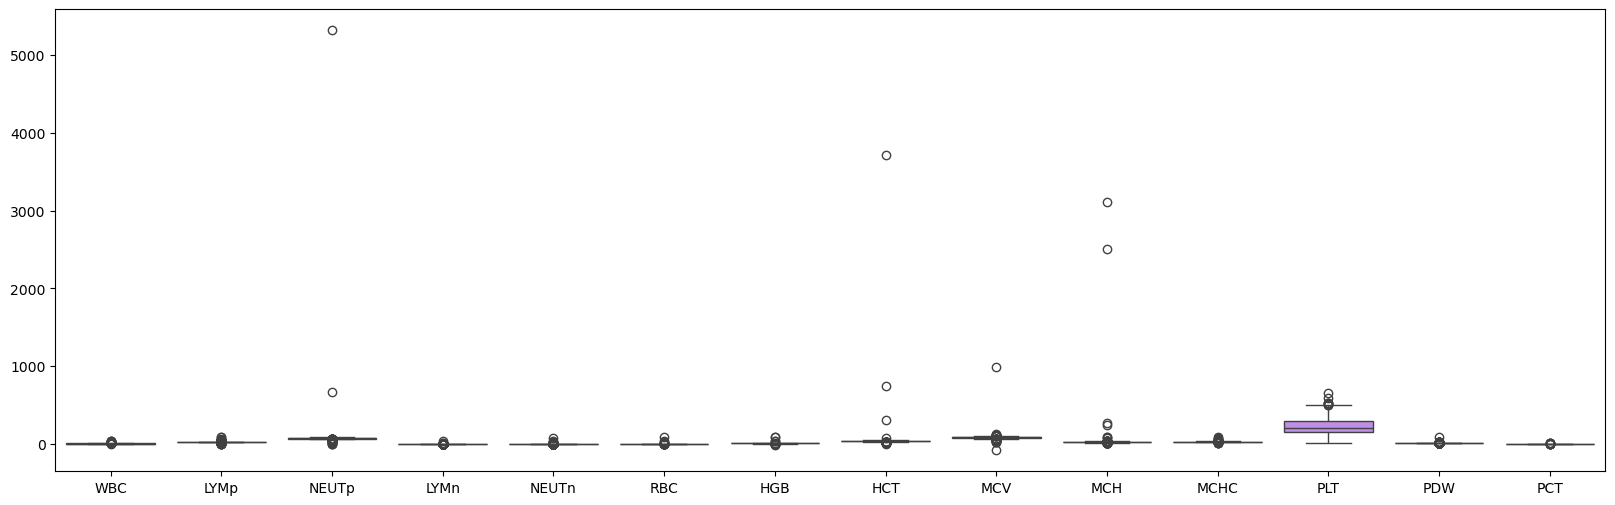

In [30]:
plt.figure(figsize=(20,6)) 
sns.boxplot(datac)

### 4.Data Preprocessing
#### 4.1 Handling Missing and Duplicate Values
-  From Simple EDA we can thate
-  There is no presence of Null values.
-  Although there is presence of 49 duplicates in data we are not removing them because there is a little difference in 1 or 2 features of the data point.There is such duplicate where every feature is having same value for the data point.

#### 4.2 Handling Outliers
- From Simple EDA we can see there is presence of outliers in data.
- Instead of blindly handling this outliers first we need to check whether these outliers are due to data entry errors, natural variations, or actual anomalies related to anemia conditions.
- So filtering the outliers values in each feature.

In [34]:
lst = datac.columns
lst = lst[:-1]
lst

Index(['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV',
       'MCH', 'MCHC', 'PLT', 'PDW', 'PCT'],
      dtype='object')

In [36]:
for i in lst:  # lst should be a list of numerical column names
    q1 = datac[i].quantile(0.25)
    q3 = datac[i].quantile(0.75)
    IQR = q3 - q1

    lower_whisker = q1 - 1.5 * IQR
    upper_whisker = q3 + 1.5 * IQR

    # Extracting only the outlier values
    outlier_values = datac[i][(datac[i] < lower_whisker) | (datac[i] > upper_whisker)]
    
    print(f"Outliers in {i}: {set(outlier_values)}")

Outliers in WBC: {0.8, 14.58, 12.8, 13.0, 13.2, 13.1, 13.8, 14.3, 13.7, 16.7, 15.4, 17.1, 13.5, 14.0, 21.7, 16.1, 24.4, 21.1, 21.2, 22.2, 23.1, 26.95, 32.72, 28.03, 41.9, 42.42, 45.7, 12.9, 12.97, 12.93, 13.4, 13.41, 13.96, 13.93, 13.16, 14.5, 14.7, 13.35, 13.85, 14.83, 15.0, 15.65, 15.53, 15.3, 14.85, 16.9, 16.2, 16.65, 17.5, 17.27, 17.7, 19.51, 19.3, 20.3, 22.9, 23.57, 23.36, 14.82}
Outliers in LYMp: {6.9, 7.3, 8.5, 9.5, 9.2, 11.3, 12.4, 11.5, 13.2, 13.1, 16.9, 17.5, 18.9, 19.1, 19.7, 20.7, 21.5, 23.0, 21.2, 24.8, 20.0, 27.0, 27.4, 27.3, 29.2, 30.2, 30.7, 31.3, 28.5, 29.1, 35.6, 36.2, 32.8, 39.1, 40.5, 41.4, 42.4, 43.2, 43.4, 44.9, 39.9, 42.5, 48.5, 49.0, 42.6, 47.3, 43.7, 45.3, 54.9, 52.1, 11.0, 48.2, 10.5, 59.2, 54.5, 12.0, 55.1, 12.5, 13.0, 13.5, 14.5, 15.0, 15.5, 16.1, 16.5, 16.0, 17.0, 89.8, 18.1, 18.6, 91.4, 18.0, 19.4, 19.6, 19.9, 19.0, 19.5, 20.9, 20.1, 20.6, 20.4, 21.9, 21.4, 21.1, 21.6, 21.0, 22.0, 22.9, 22.1, 22.6, 22.4, 23.6, 23.9, 23.4, 24.0, 24.1, 24.6, 24.5, 24.9, 25.4

- From above we can see the detected outliers in each feature of the dataset using the IQR method.
- There are very large number of Outlier values in each feature. We cannot directly remove or handle this values as it may result in bad performance of the model.
- Since this is a medical dataset, these outliers may represent rare but important clinical cases rather than errors.
- Instead of removing them, we will retain them for analysis and model training, ensuring we do not lose valuable insights.
- Instead of removing outliers, we follow these best practices:
1) Keep outliers and use robust models like Decision Trees, Random Forest.
2) Apply RobustScaler instead of StandardScaler 

#### 4.3 Handling Negative Values in Features)

In [40]:
for i in lst:
    if  (datac[i] < 0).any():
        print(f"{i} has Presence of negative values")

HGB has Presence of negative values
MCV has Presence of negative values


- There are negative values in HGB and MCV. HGB means The amount of hemoglobin in the blood, crucial for oxygen transport and MCV means Average volume of a single red blood cell. These 2 values cannot be negative.

In [43]:
mean_HGB = datac[datac['HGB'] > 0]['HGB'].mean()
datac['HGB'] = np.where(datac['HGB'] < 0, mean_HGB, datac['HGB'])

In [45]:
mean_HGB = datac[datac['MCV'] > 0]['MCV'].mean()
datac['MCV'] = np.where(datac['MCV'] < 0, mean_HGB, datac['MCV'])

## 5.Exploratory Data Analysis

In [48]:
datac.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


### 5.1.Univariate Analysis

#### 5.1.1 Individual Feature Analysis

In [52]:
lst = datac.columns
lst = lst[:-1]
lst

Index(['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV',
       'MCH', 'MCHC', 'PLT', 'PDW', 'PCT'],
      dtype='object')

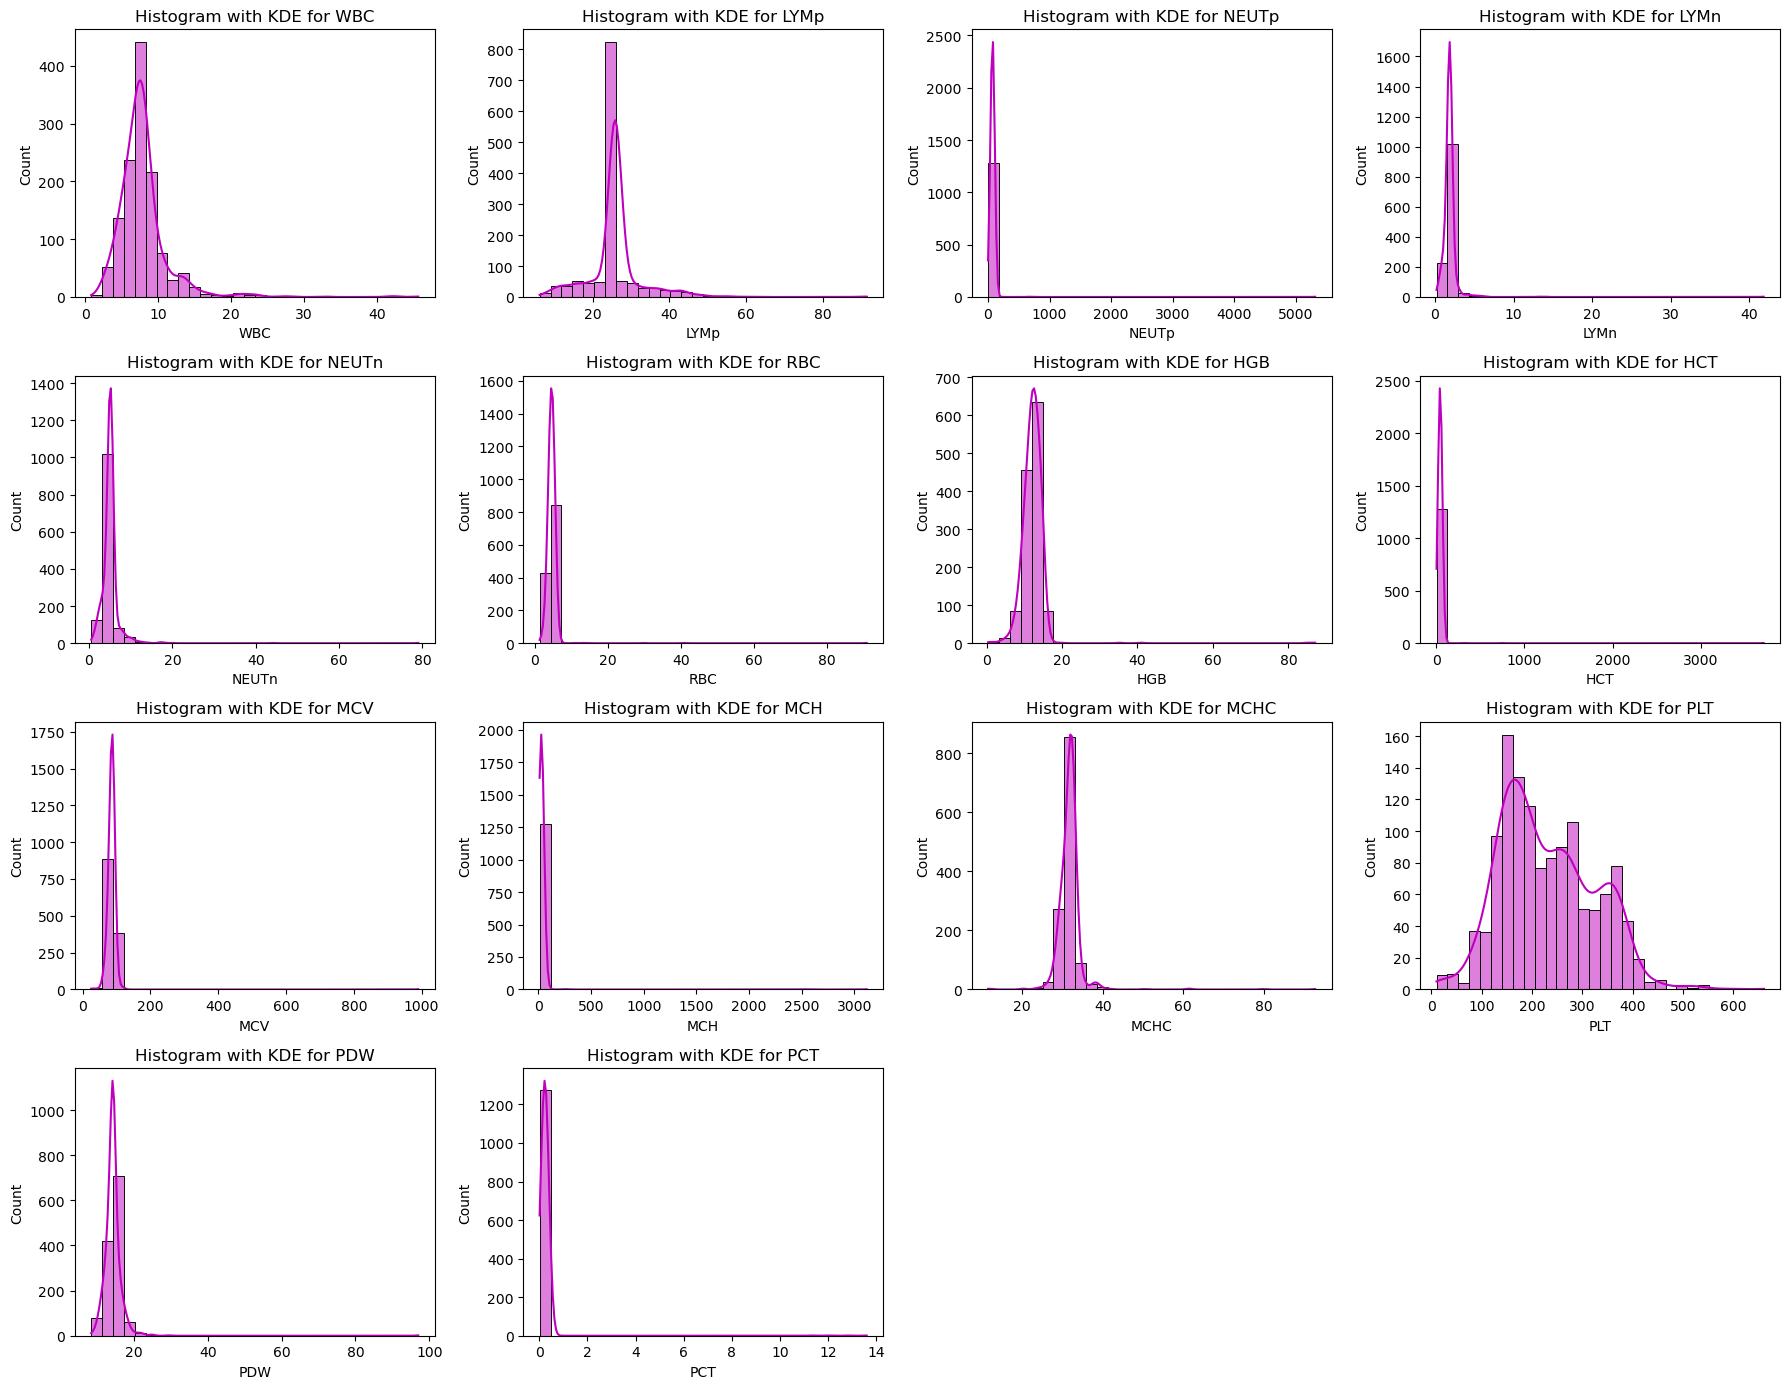

In [54]:
plt.figure(figsize=(18, 14))
index = 1
for col in lst:
    plt.subplot(4, 4, index)
    sns.histplot(data=datac, x=col, kde=True, bins=30, color='m')
    plt.title(f"Histogram with KDE for {col}")
    plt.xticks(rotation=0)
    index += 1
plt.tight_layout()
plt.show()

#### Insights
- Many features, including WBC, LYMp, NEUTp, LYMn, NEUTn, RBC, HCT, MCV, MCH, PDW, and PCT, show a right-skewed distribution (long tail on the right side).
- This suggests that a few patients have extremely high values, which could indicate severe medical conditions.
- Features like NEUTp, HCT, and MCH show some extreme values, confirming the presence of outliers (as previously detected).
- The long right tail in features like PLT and PDW suggests some patients have very high platelet counts.
- PLT (Platelet Count) seems to have a multi-modal distribution, which could mean there are different groups of patients (e.g., healthy vs. anemic patients).
- Features like HGB, MCHC, and PCT show very narrow distributions, meaning most patients fall within a small range of values.
- This could indicate that these features are consistent and stable across the population.

#### 5.1.2 Target Variable Analysis

In [57]:
df = datac["Diagnosis"].value_counts()
df

Diagnosis
Healthy                           336
Normocytic hypochromic anemia     279
Normocytic normochromic anemia    269
Iron deficiency anemia            189
Thrombocytopenia                   73
Other microcytic anemia            59
Leukemia                           47
Macrocytic anemia                  18
Leukemia with thrombocytopenia     11
Name: count, dtype: int64

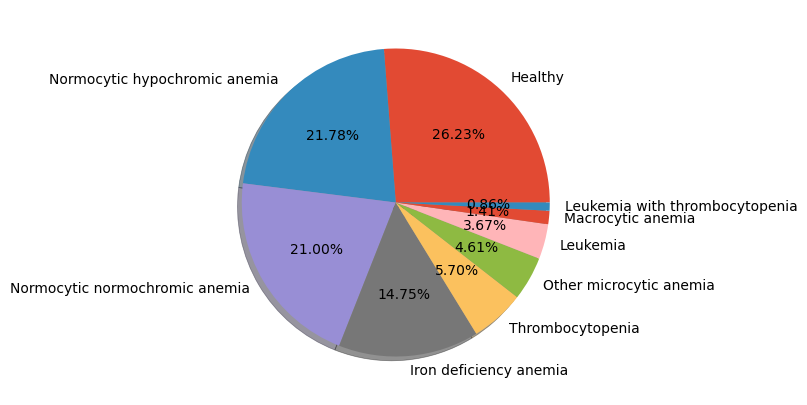

In [58]:
plt.figure(figsize = (5,5))
plt.pie(df,labels = df.index,autopct = "%1.2f%%",colors =plt.style.use("ggplot"),
       shadow = True)
plt.show()

#### Insights
- The dataset is imbalanced, with "Healthy" (26.23%) and "Normocytic hypochromic anemia" (21.78%) being the most common classes.
- The dataset includes multiple anemia subtypes, such as Normocytic hypochromic (21.78%), Normocytic normochromic (21%), Iron deficiency anemia (14.75%), and others.
- Rare conditions like "Leukemia with thrombocytopenia" (0.86%) and "Macrocytic anemia" (1.14%) have very few samples.
- Evaluating F1-score and recall (rather than just accuracy) will be important.

### 5.2.Bivariate Analysis

#### 5.2.1. Analysis of each feature variation with target variable.

In [65]:
lst = datac.columns
lst1 = lst[:7]
lst2 = lst[7:-1]
lst1,lst2

(Index(['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB'], dtype='object'),
 Index(['HCT', 'MCV', 'MCH', 'MCHC', 'PLT', 'PDW', 'PCT'], dtype='object'))

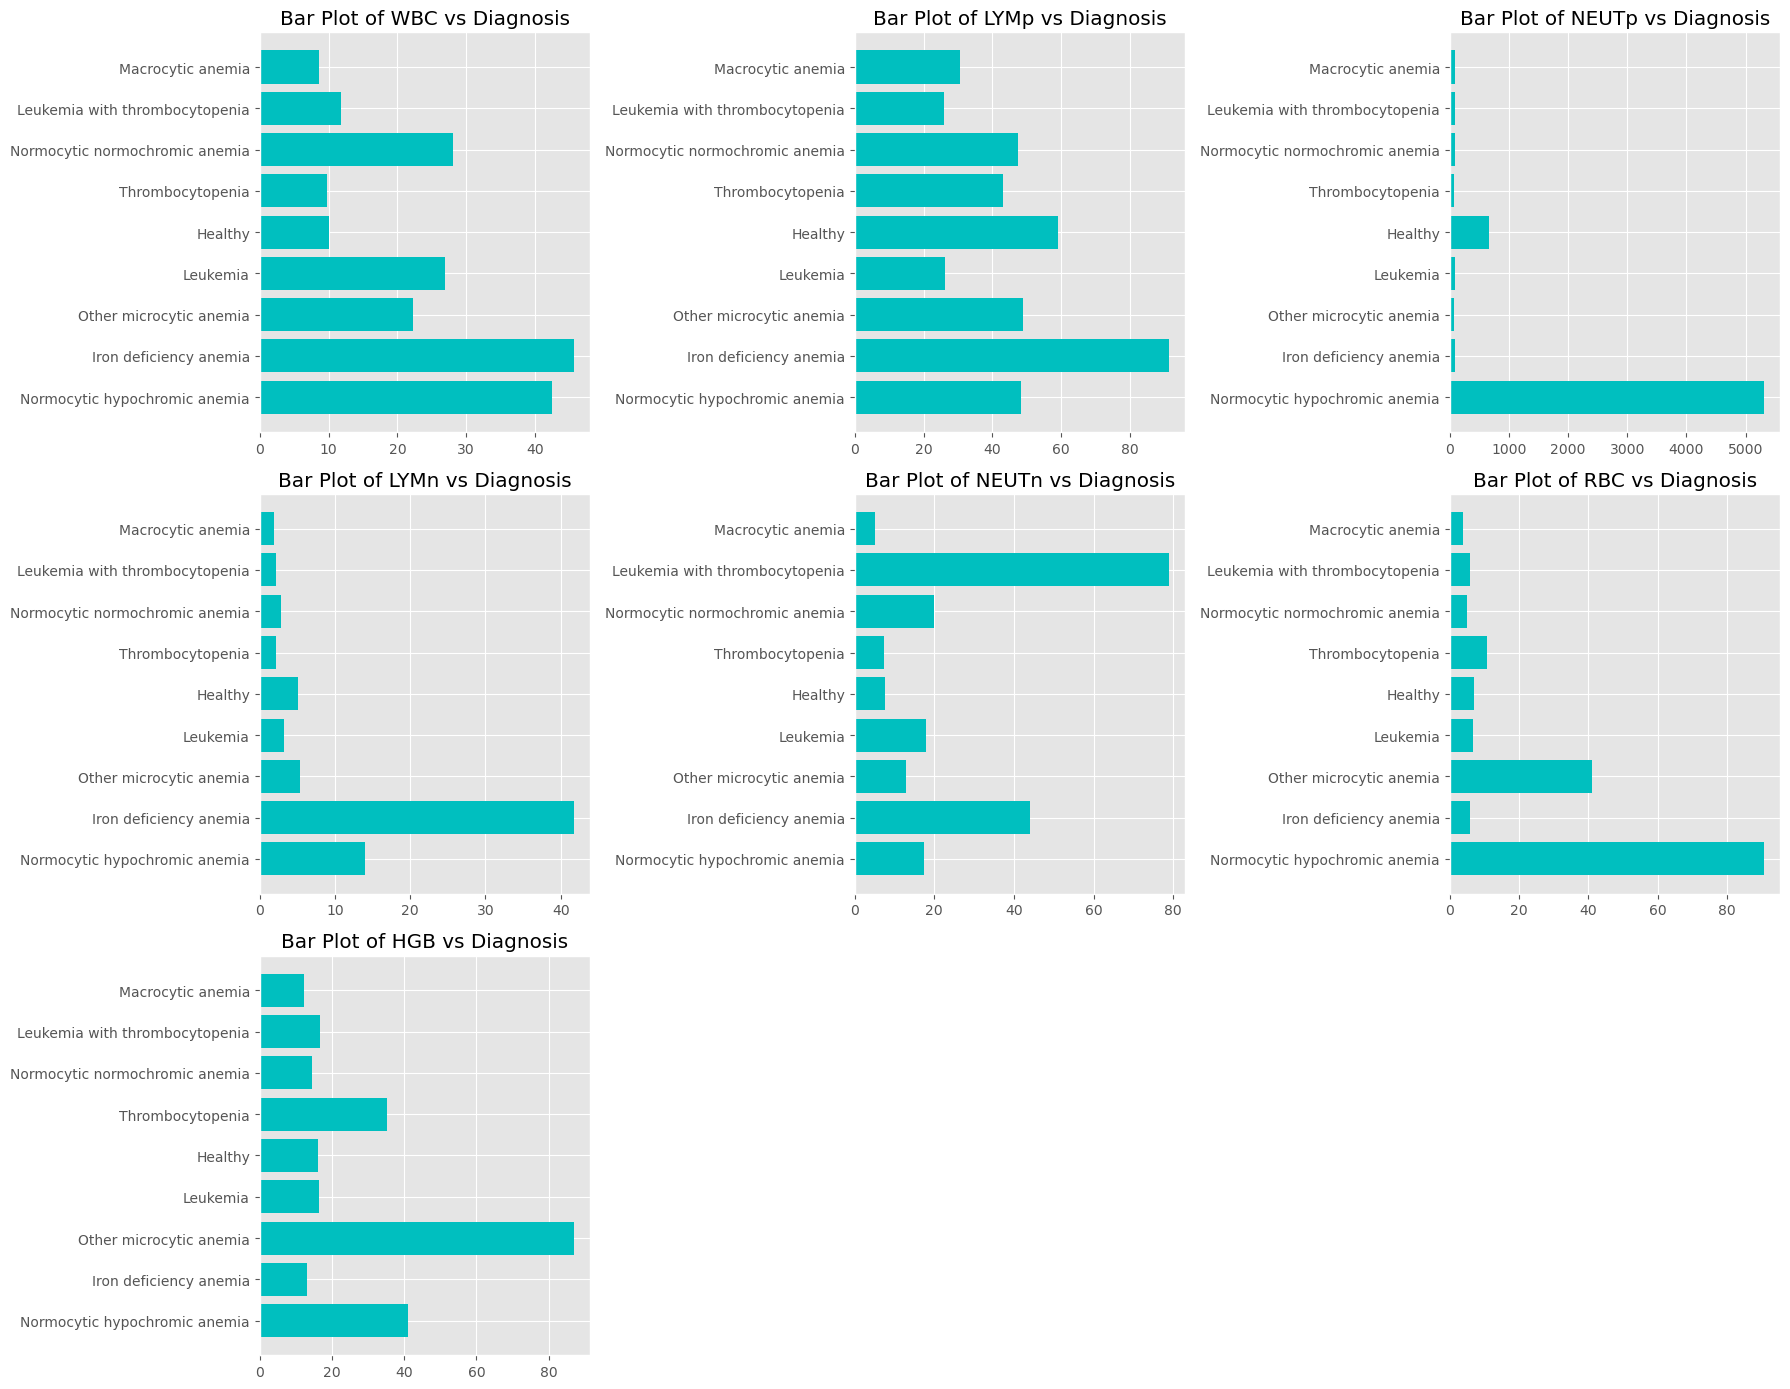

In [67]:
plt.figure(figsize=(18, 14))
index = 1

for col in lst1:
    plt.subplot(3,3, index)
    plt.barh(datac["Diagnosis"], datac[col], color="c")  
    plt.title(f"Bar Plot of {col} vs Diagnosis")  
    plt.xticks(rotation=0)  
    index += 1

plt.tight_layout()
plt.show()

#### Insights

##### 1) White Blood Cell (WBC) Count
- Normocytic hypochromic anemia, Normocytic normochromic anemia and  Iron deficiency anemia seem to have relatively higher WBC counts compared to other diagnoses.
- Other Macrocytic anemia and Leukemia exbit moderate WBC counts.
- Rest types shows a low WBC count.

##### 2) Neutrophils (NEUTp & NEUTn)
- Normocytic hypochromic anemia shows a very high Neutrophil Percentage(NEUTp),healthy category shows very slight percentage and rest of the anemia types shows very very low Neutrophil Percentage(NEUTp).
- Leukemia with thrombocytopenia shows very high  Neutrophil Count(NEUTn),Iron defiency shows moderate Neutrophil Count(NEUTn) abd rest of the anemia type low Neutrophil Count(NEUTn).
  
##### 3) Red Blood Cell (RBC) Count
- Normocytic hypochromic anemia shows a high RBC count.
- Other microcytic anemia also exhibit higher RBC counts compared to the other categories.
- All other diagnosis like Macrocytic anemia,Iron deficiency Leukemia with thrombocytopenia, Normocytic normochromic anemia, Thrombocytopenia, Healthy, and Leukemia show relatively lower RBC count.

##### 4) Hemoglobin (HGB)
- Iron deficiency anemia and Macrocytic anemia shows low hemoglobin levels.
- Normocytic normochromic anemia, Thrombocytopenia and healthy has moderate hemoglobin level.
- Other Microcytic anemia has higher levels of Hemoglobin.

##### 5) Lymphocyte(LYMp & LYMn)
-  Iron deficiency anemia show high Lymphocyte percentage(LYMp) and rest categories shows moderate Lymphocyte percentage(LYMp).
-  Iron deficiency anemia show high Lymphocyte count(LYMn),Normocytic Hypochromic anemia  and Thrombocytopenia anemia shows moderate Lymphocyte count(LYMn) and rest categories show low Lymphocyte count(LYMn).


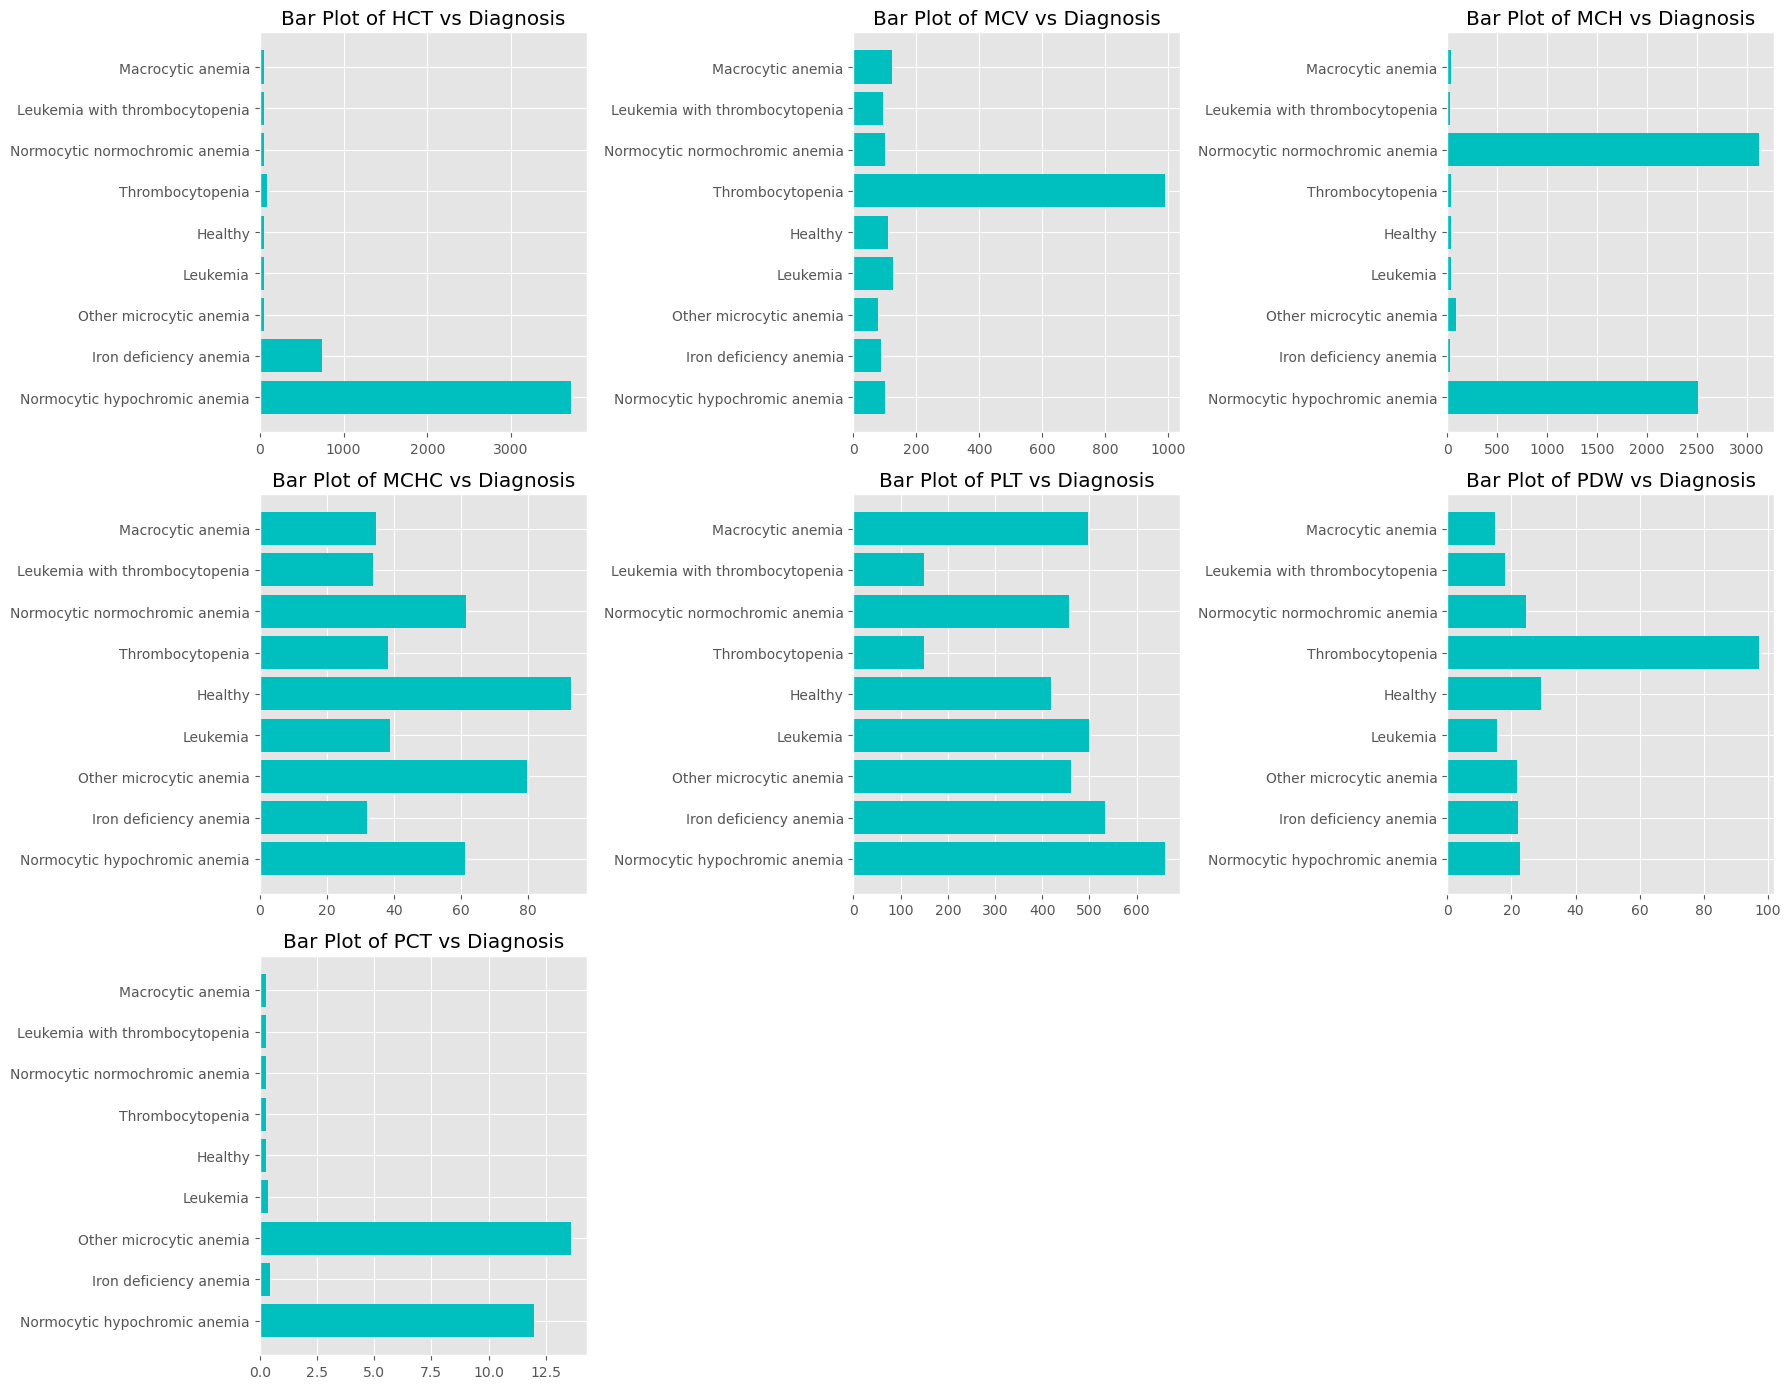

In [69]:
plt.figure(figsize=(18, 14))
index = 1

for col in lst2:
    plt.subplot(3,3, index)
    plt.barh(datac["Diagnosis"], datac[col], color="c")  
    plt.title(f"Bar Plot of {col} vs Diagnosis")  
    plt.xticks(rotation=0)  
    index += 1

plt.tight_layout()
plt.show()

##### 6) Hematocrit (HCT)
- Normocytic hypochromic anemia appears to have a significantly higher HCT value compared to other diagnoses. 
- Iron deficiency anemia also shows a notable HCT value, though less than Normocytic hypochromic anemia

##### 7) Mean Corpuscular Volume (MCV)
- Thrombocytopenia  anemia appears to have higher MCV than other categories and rest of the categories shows very lower MCV values.

##### 8) Mean Corpuscular Hemoglobin (MCH)
- Normocytic hypochromic anemia  and  Normocytic normochromic anemia has a high MCH value.
- Rest of the anemia types have very very low MCH value.

##### 9) Mean Corpuscular Hemoglobin Concentration (MCHC)
- Healthy category seems to have a higher MCHC value compared to the rest.
- Normocytic hypochromic anemia  and  Normocytic normochromic anemia has similar values of MCHC.

##### 10) Platelet Count (PLT)
- Normocytic hypochromic anemia  a higher platelet count than other anemia conditions.
- Iron deficiency anemia and Macrocytic anemia has similar values of platelet count.

##### 11) Platelet Distribution Width (PDW)
- Thrombocytopenia has a distinctly higher PDW compared to other diagnoses.

##### 12) Plateletcrit (PCT)
- The PCT levels are elevated in individuals with normocytic hypochromic anemia and Other Microcytic anemia.

#### 5.2.3. In-depth analysis of each feature variation with target variable.

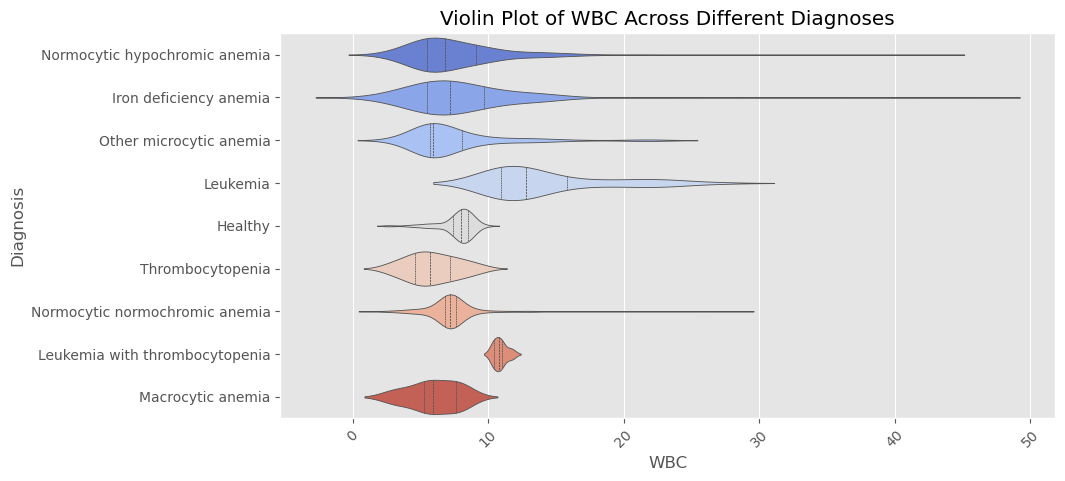

In [74]:
plt.figure(figsize=(10, 5))
sns.violinplot(y='Diagnosis', x= "WBC", data=datac,hue = "Diagnosis", palette="coolwarm", inner="quartile")
plt.xticks(rotation=45)
plt.title("Violin Plot of WBC Across Different Diagnoses")
plt.show() 

#### Insights

#####  WBC Distribution Varies Across Diagnoses:
- The widest distribution is seen in Leukemia, indicating extreme variations in WBC levels.
- The violin for Healthy individuals is thin and centered around normal WBC values (~4–10).This suggests that healthy WBC levels are stable and not widely distributed.
- Iron Deficiency & Normocytic Hypochromic Anemia show a moderate spread but mostly within normal WBC ranges.And both are right skewed showing high values of WBC.
- Patients with Thrombocytopenia (low platelet count) exhibit a wider WBC range.
- Leukemia with Thrombocytopenia Shows a Distinctive WBC Spread which is very narrow.
- Leukemia with Thrombocytopenia distribution is narrow and on the lower side, indicating that RBC levels in these patients are consistently low.


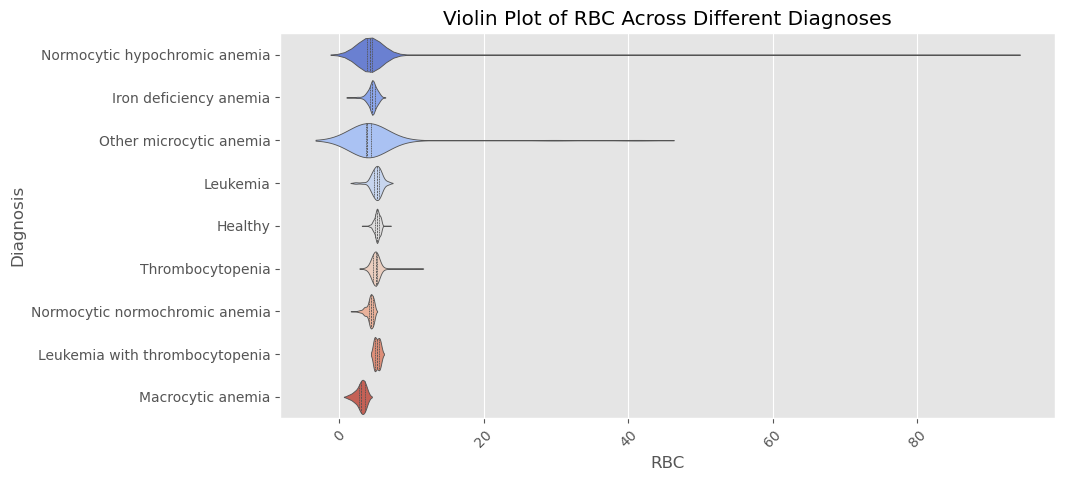

In [77]:
plt.figure(figsize=(10, 5))
sns.violinplot(y='Diagnosis', x= "RBC", data=datac,hue = "Diagnosis", palette="coolwarm", inner="quartile")
plt.xticks(rotation=45)
plt.title("Violin Plot of RBC Across Different Diagnoses")
plt.show() 

#### Insights
#####  RBC Distribution Varies Across Diagnoses:
- The violin for Healthy individuals is thin and centered around normal RBC values.
- Iron Deficiency Anemia, Normocytic Hypochromic Anemia, and Macrocytic Anemia have lower RBC distributions.This is expected, as anemia is characterized by low red blood cell counts.
- The RBC distribution for Leukemia patients is narrow and slightly lower than Healthy individuals.
- Other Microcytic Anemia has a long tail with extreme values, suggesting some patients have very high RBC counts while others have low RBC counts.

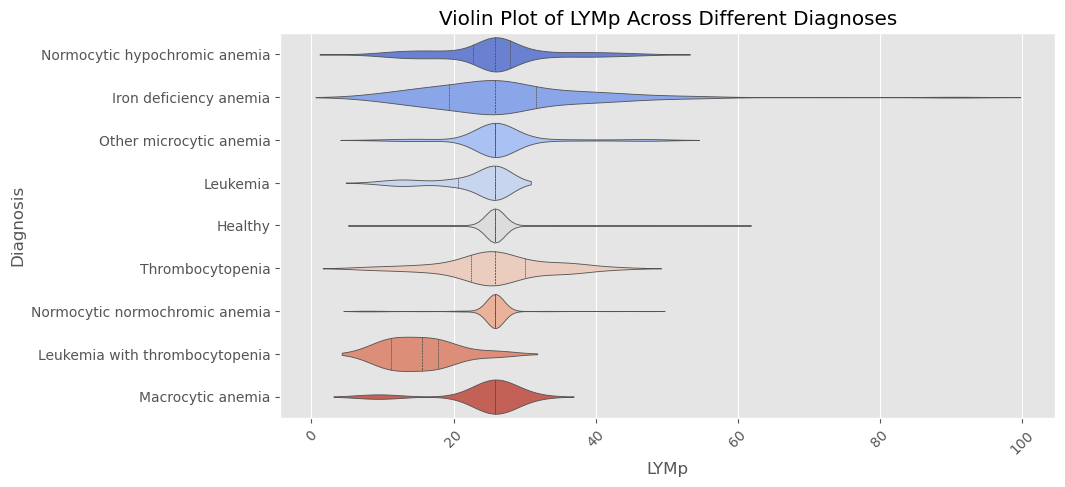

In [80]:
plt.figure(figsize=(10, 5))
sns.violinplot(y='Diagnosis', x= "LYMp", data=datac,hue = "Diagnosis", palette="coolwarm", inner="quartile")
plt.xticks(rotation=45)
plt.title("Violin Plot of LYMp Across Different Diagnoses")
plt.show() 

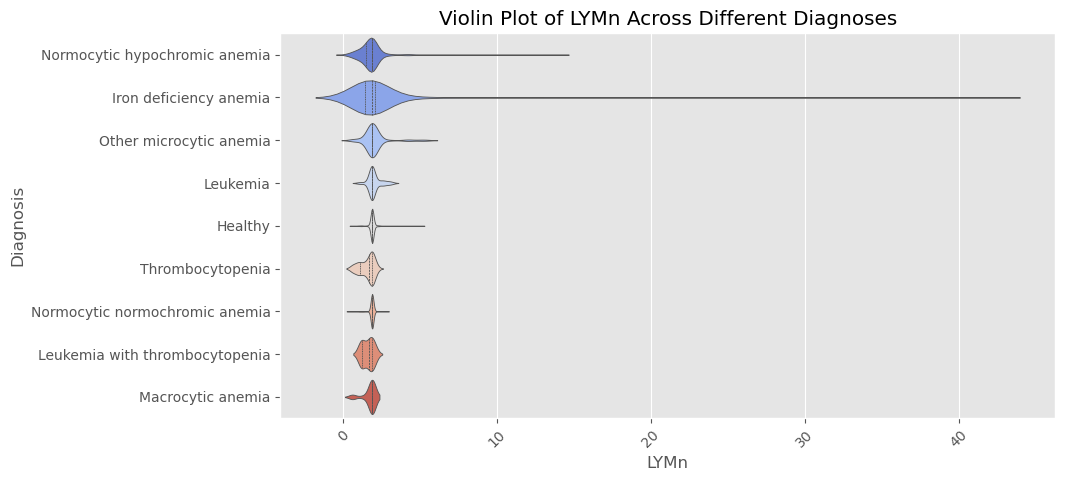

In [82]:
plt.figure(figsize=(10, 5))
sns.violinplot(y='Diagnosis', x= "LYMn", data=datac,hue = "Diagnosis", palette="coolwarm", inner="quartile")
plt.xticks(rotation=45)
plt.title("Violin Plot of LYMn Across Different Diagnoses")
plt.show() 

#### Insights
#####  LYMp & LYMn Distribution Varies Across Diagnoses.
- Lymphocyte percentage (LYMp) varies significantly across conditions.
- Leukemia shows a more concentrated distribution at higher LYM percentages, as expected.
- "Normocytic hypochromic anemia" and "Iron deficiency anemia" show a broad spread of LYM values, with some high outliers.Healthy individuals show a relatively centered distribution, without extreme outliers.
- Lymphocyte count (LYMn) shows a similar pattern, but with a larger spread in iron deficiency anemia and normocytic hypochromic anemia.
- Leukemia cases again show higher LYM values, consistent with immune system abnormalities.
- Some extreme outliers exist in normocytic hypochromic anemia, possibly indicating data inconsistencies or special cases.

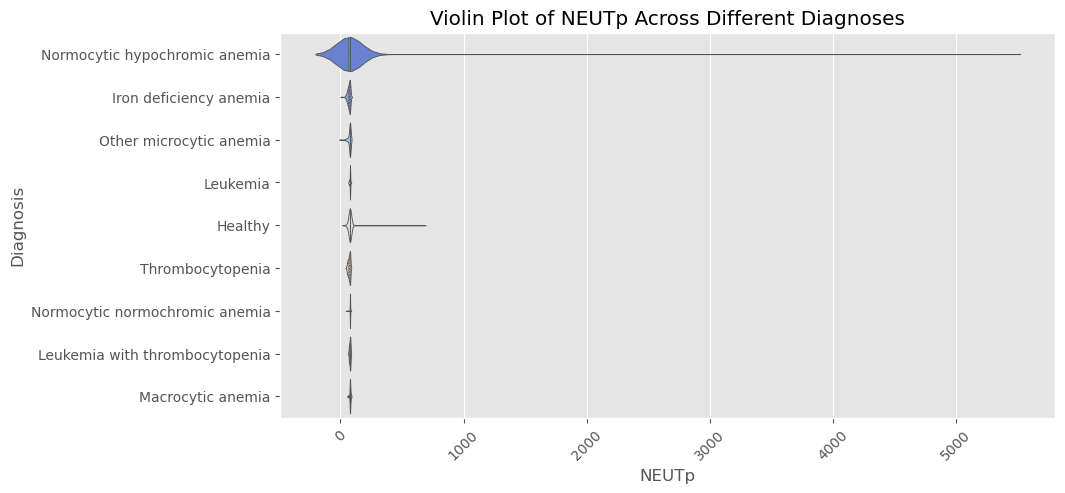

In [85]:
plt.figure(figsize=(10, 5))
sns.violinplot(y='Diagnosis', x= "NEUTp", data=datac,hue = "Diagnosis", palette="coolwarm", inner="quartile")
plt.xticks(rotation=45)
plt.title("Violin Plot of NEUTp Across Different Diagnoses")
plt.show() 

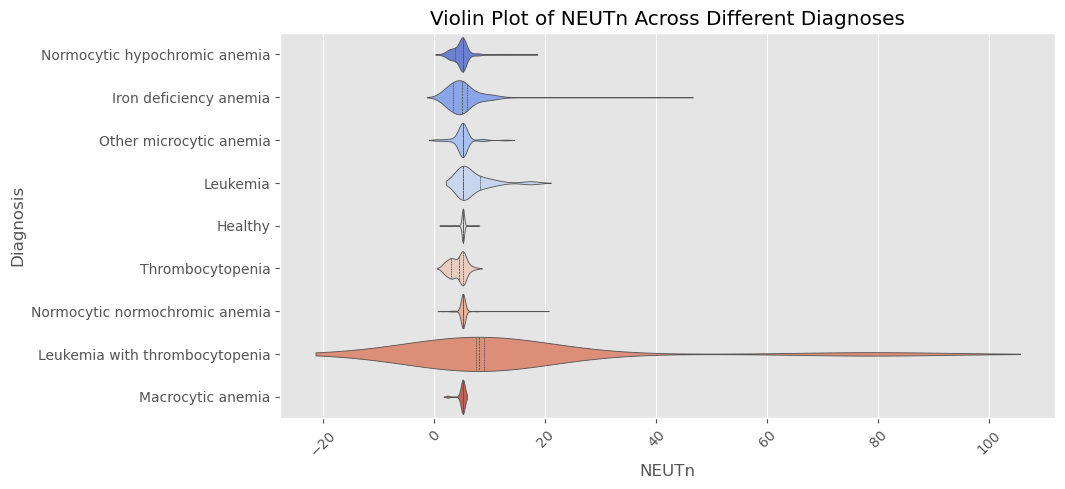

In [87]:
plt.figure(figsize=(10, 5))
sns.violinplot(y='Diagnosis', x= "NEUTn", data=datac,hue = "Diagnosis", palette="coolwarm", inner="quartile")
plt.xticks(rotation=45)
plt.title("Violin Plot of NEUTn Across Different Diagnoses")
plt.show() 

#### Insights
#####  NEUTp & NEUTn Distribution Varies Across Diagnoses.
- Leukemia with thrombocytopenia has a significantly wider distribution, extending up to extreme NEUTn values (~100), indicating high variance.
- Iron deficiency anemia shows a right-skewed distribution with some high outliers.
- Healthy individuals have a narrow and centered distribution, suggesting consistency in NEUTn levels.
- Thrombocytopenia and Normocytic normochromic anemia have lower NEUTn values with compact distributions.
- Normocytic hypochromic anemia and Other microcytic anemia have similar distributions, showing slightly elevated values.
- Normocytic hypochromic anemia  exhibits extremely high NEUTp values (going beyond 5000), indicating a significant spread and large variations.
- Healthy individuals have a relatively small distribution of NEUTp values, similar to the first plot.
- Most anemic conditions (Normocytic hypochromic anemia, Iron deficiency anemia, etc.) have very small NEUTp values, clustering close to zero.

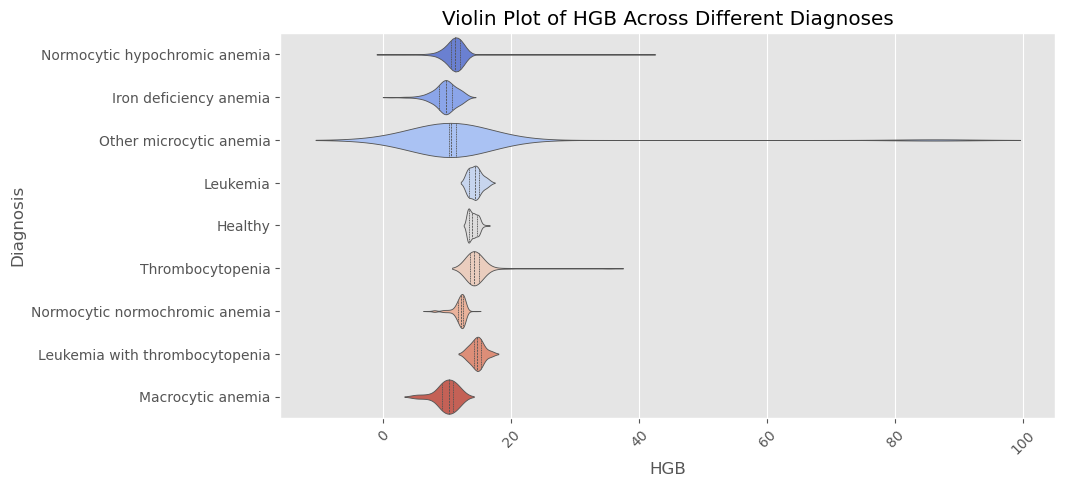

In [90]:
plt.figure(figsize=(10, 5))
sns.violinplot(y='Diagnosis', x= "HGB", data=datac,hue = "Diagnosis", palette="coolwarm", inner="quartile")
plt.xticks(rotation=45)
plt.title("Violin Plot of HGB Across Different Diagnoses")
plt.show() 

#### Insights
##### HGB Distribution Varies Across Diagnoses:
- Normocytic Hypochromic Anemia and Iron Deficiency Anemia have wider violins, meaning a higher variability in HGB levels.They show a left skew, meaning many patients have low HGB values. 
- Other Microcytic Anemia has an extremely wide violin, indicating a large variation in HGB values.
- Leukemia & Healthy Categories  have narrow, concentrated violins, indicating HGB values are consistent and fall within a small range.
- The healthy group has slightly higher HGB levels than leukemia patients.
- Thrombocytopenia & Macrocytic Anemia have relatively balanced distributions, with most data concentrated around a central value.Thrombocytopenia shows right skew showing some patients has high HGB values.

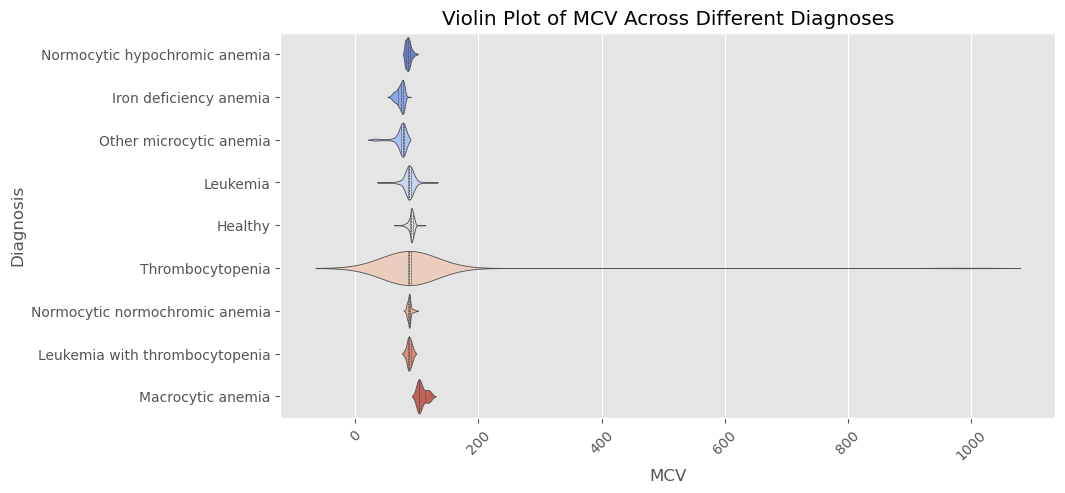

In [93]:
plt.figure(figsize=(10, 5))
sns.violinplot(y='Diagnosis', x= "MCV", data=datac,hue = "Diagnosis", palette="coolwarm", inner="quartile")
plt.xticks(rotation=45)
plt.title("Violin Plot of MCV Across Different Diagnoses")
plt.show() 

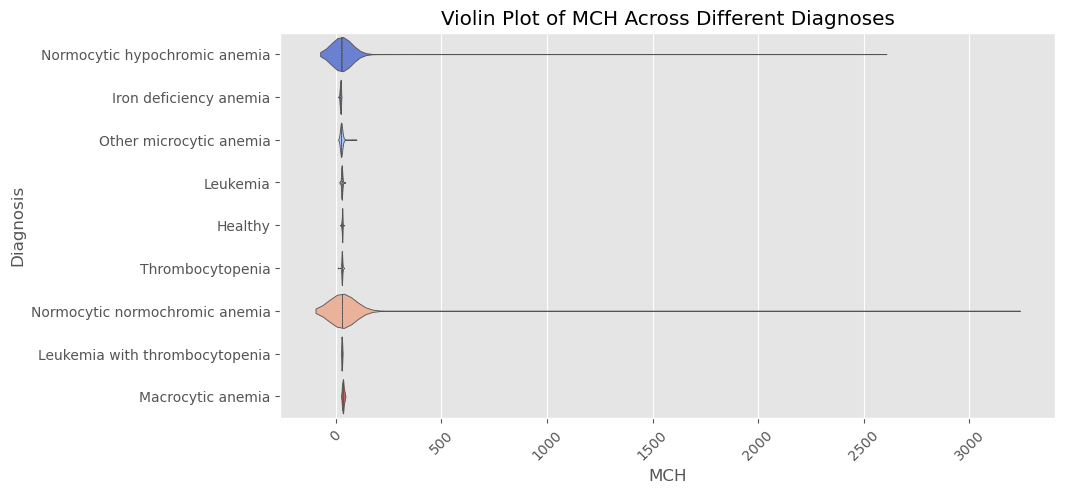

In [95]:
plt.figure(figsize=(10, 5))
sns.violinplot(y='Diagnosis', x= "MCH", data=datac,hue = "Diagnosis", palette="coolwarm", inner="quartile")
plt.xticks(rotation=45)
plt.title("Violin Plot of MCH Across Different Diagnoses")
plt.show() 

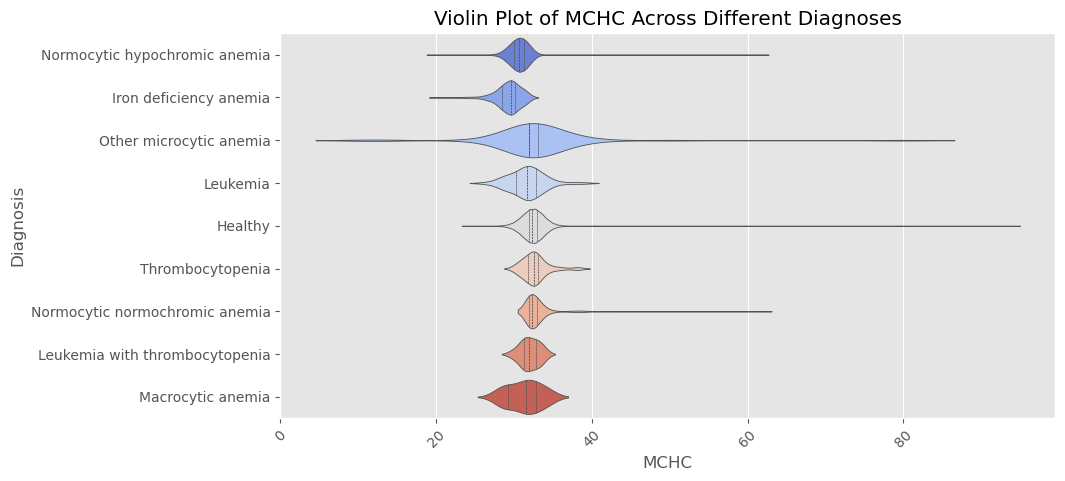

In [97]:
plt.figure(figsize=(10, 5))
sns.violinplot(y='Diagnosis', x= "MCHC", data=datac,hue = "Diagnosis", palette="coolwarm", inner="quartile")
plt.xticks(rotation=45)
plt.title("Violin Plot of MCHC Across Different Diagnoses")
plt.show() 

#### Insights
##### MCV,MCH & MCHC Distribution Varies Across Diagnoses:
##### 1) MCV
- Thrombocytopenia has a very broad distribution, suggesting variability in MCV among these patients.
- Microcytic anemias (Iron Deficiency, Other Microcytic Anemia) cluster around lower MCV values, supporting their classification.
- Macrocytic anemia has the highest MCV values, which aligns with its definition.Healthy individuals have a narrower, more stable distribution, showing consistency in MCV.
##### 2) MCH
- Normocytic Normochromic Anemia & Normocytic Hypochromic Anemia show a broader distribution of MCH, possibly indicating a mixed population.
- Other anemia types seem compressed, suggesting inconsistent data representation.
##### 3)MCHC
- Iron Deficiency Anemia & Other Microcytic Anemia has lower MCHC values, which align with microcytic hypochromic anemia characteristics.
- Healthy individuals have a relatively narrow distribution around a normal MCHC range.Normocytic Hypochromic Anemia & Leukemia groups show overlap, suggesting similarities in MCHC values.

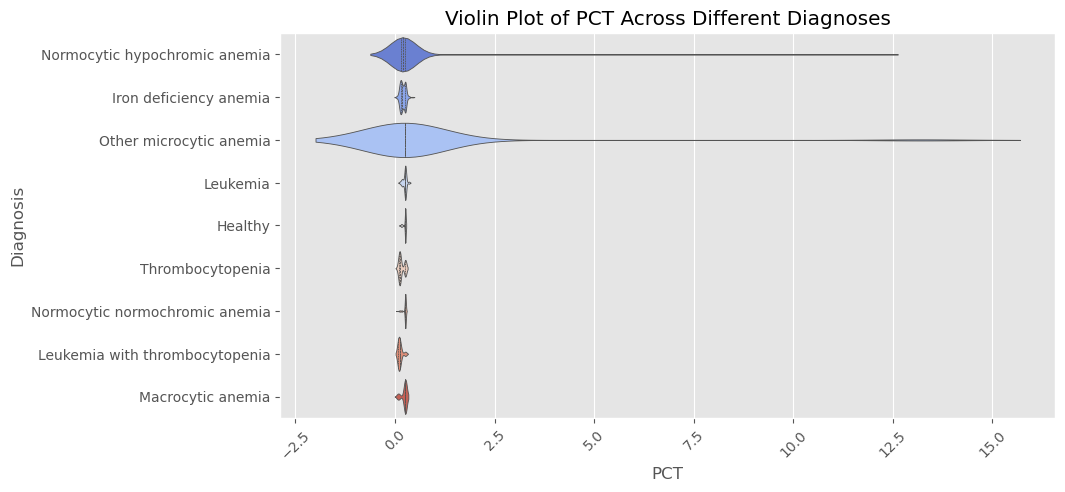

In [100]:
plt.figure(figsize=(10, 5))
sns.violinplot(y='Diagnosis', x= "PCT", data=datac,hue = "Diagnosis", palette="coolwarm", inner="quartile")
plt.xticks(rotation=45)
plt.title("Violin Plot of PCT Across Different Diagnoses")
plt.show() 

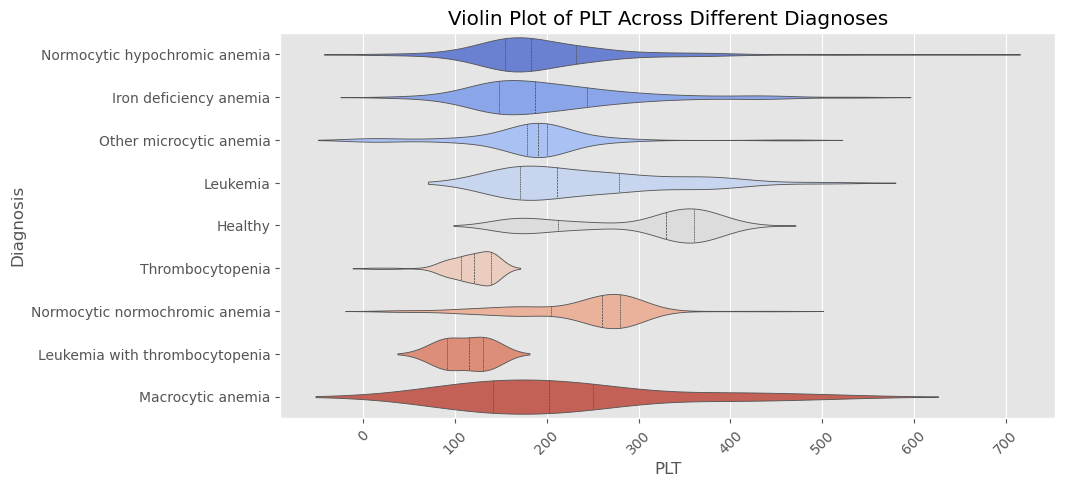

In [102]:
plt.figure(figsize=(10, 5))
sns.violinplot(y='Diagnosis', x= "PLT", data=datac,hue = "Diagnosis", palette="coolwarm", inner="quartile")
plt.xticks(rotation=45)
plt.title("Violin Plot of PLT Across Different Diagnoses")
plt.show() 

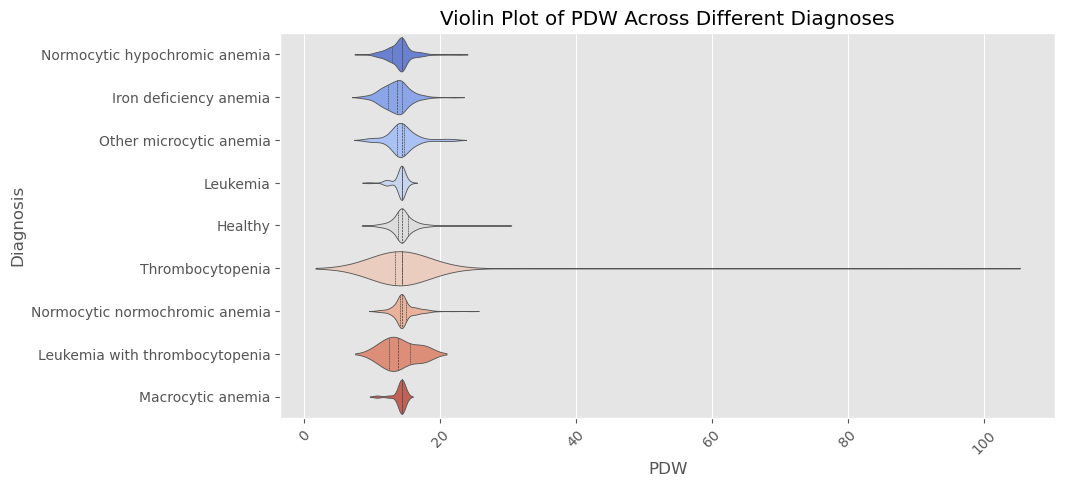

In [104]:
plt.figure(figsize=(10, 5))
sns.violinplot(y='Diagnosis', x= "PDW", data=datac,hue = "Diagnosis", palette="coolwarm", inner="quartile")
plt.xticks(rotation=45)
plt.title("Violin Plot of PDW Across Different Diagnoses")
plt.show() 

#### Insights
##### 1)PDW (Platelet Distribution Width) Across Diagnoses:
- Thrombocytopenia has a significantly wider spread in PDW values compared to other conditions.
- Healthy individuals have a relatively narrow distribution.
- Leukemia and different types of anemia show distinct PDW distributions, which could be useful in distinguishing between these conditions.

##### 2)PLT (Platelet Count) Across Diagnoses:
- Normocytic hypochromic anemia, iron deficiency anemia, and other microcytic anemias tend to have higher platelet counts.
- Thrombocytopenia has a much lower PLT range, which aligns with its clinical characteristics.
- Leukemia patients exhibit a wide range of platelet counts, indicating variability in disease presentation.
- Macrocytic anemia has the largest spread of platelet counts, suggesting a diverse patient population.

##### 3)PCT (Plateletcrit) Across Diagnoses:
- Normocytic hypochromic anemia and other microcytic anemias show significantly higher PCT values.
- Other conditions, including healthy individuals, thrombocytopenia, and macrocytic anemia, have much lower PCT values.

### 5.3 Multivariante Analysis

In [108]:
df_numeric = datac.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()

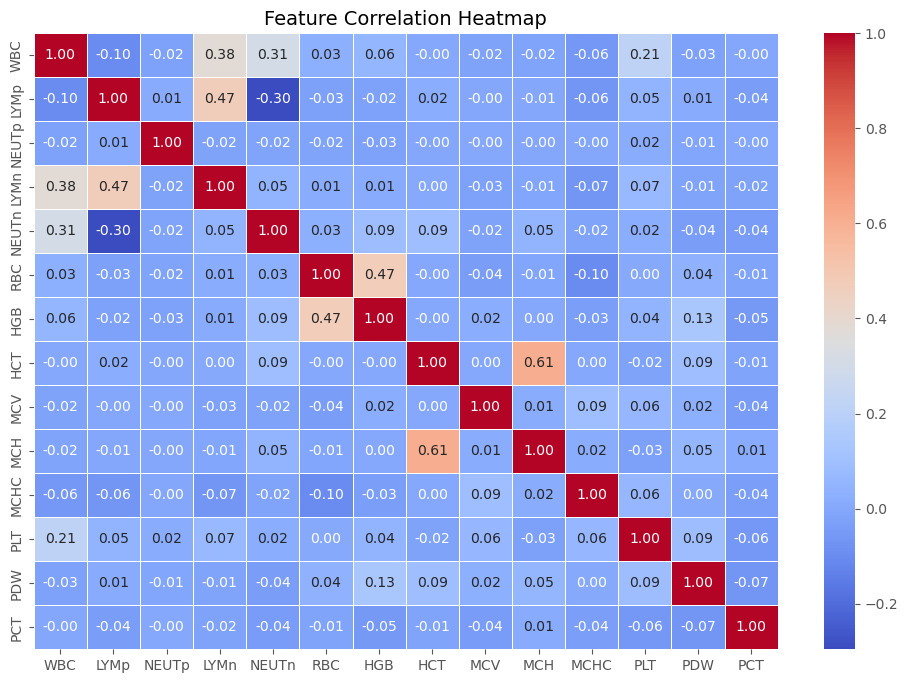

In [110]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

##### 1) Highly Correlated Features (Red Blocks, Close to +1)
- HCT & MCH (0.61) → High correlation suggests that an increase in hematocrit (HCT) is associated with an increase in mean corpuscular hemoglobin (MCH).
- RBC & HGB (0.47) → Hemoglobin (HGB) is naturally expected to be correlated with red blood cells (RBC), as RBCs carry hemoglobin.
- LYMp & LYMn(0.47) →  Lymphocyte percentage(LYMp) and Lymphocyte count(LYMn) are correleted as they are related to each other.

##### 2) Negative or Weak Correlations (Blue Blocks, Close to -1 or 0)
- LYMp & NEUTp (-0.30) → Lymphocyte percentage (LYMp) and Neutrophil percentage (NEUTp) are inversely related, which aligns with medical understanding.
- WBC & LYMp (-0.10) → Weak inverse correlation indicates that an increase in white blood cells (WBC) does not always mean an increase in lymphocytes.

- Platelet indices (PLT, PDW, and PCT) are tightly related → Changes in platelet count affect these features together.

## 6.Model Training

#### 6.1 Identifying Feature variables and Class Variables.

- From our data we can see that "Diagnosis" column is our Class Variable and rest of the columns are our feature variables.

In [116]:
fv=datac.iloc[:,:-1]
cv=data.iloc[:,-1]

In [118]:
fv.head(2)

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16


In [120]:
cv.head(2)

0    Normocytic hypochromic anemia
1    Normocytic hypochromic anemia
Name: Diagnosis, dtype: object

#### 6.2 Feature Preprocessing

- We can see our class variable dtype is of strings so we need to encode it before training the Model.Here we encodes our categorical target variable into numerical labels using LabelEncoder.

In [124]:
le = LabelEncoder()

In [126]:
cv = le.fit_transform(cv)

In [128]:
cv

array([5, 5, 1, ..., 0, 0, 0])

In [130]:
cv = pd.DataFrame(cv)

In [132]:
cv.head(2)

,0
0,5
1,5


- Here I am not performing feature scaling because I want to train my model either using Decision Tree and Random Forest algorithms so this both does not require feature scaling.

#### 6.3 Dividing data into Train and Test Data.

In [136]:
x_train,x_test,y_train,y_test = train_test_split(fv,cv,test_size =0.2,random_state = 43)

#### 6.4 Hyperparameter Tunning

- It is our responsibility to make the machine neither overfitting nor underfitting.his can be achieved by carefully selecting the hyperparameters of the algorithm.
- However, manually choosing the best hyperparameter values is difficult, as their impact varies across different datasets.
- Instead, we can use hyperparameter tuning techniques, such as Optuna, to automatically find the optimal values.
- Optuna efficiently searches for the best hyperparameters, helping us improve model performance while maintaining generalization.

In [140]:
import optuna

def objective(trial):
    max_depth = trial.suggest_int("max_depth", 5, 15)  
    max_features = trial.suggest_int("max_features", 4,10)  
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease", 0.01, 0.1)  
    min_samples_split = trial.suggest_int("min_samples_split", 5, 20) 
    

    dtc = DecisionTreeClassifier(
        max_depth=max_depth, 
        max_features=max_features,
        min_samples_split=min_samples_split, 
        min_impurity_decrease=min_impurity_decrease,
        class_weight = "balanced"
        
    )

    
    scoring_metric = "recall_weighted"

    
    scores = cross_validate(dtc, X=x_train, y=y_train, cv=3, scoring=scoring_metric, return_train_score=True)

   
    test_acc = scores["test_score"].mean()
    train_acc = scores["train_score"].mean()

    
    trial.set_user_attr("training accuracy", train_acc)

    return test_acc

In [183]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 300)  
    max_depth = trial.suggest_int("max_depth", 5, 20)  
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)  
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease", 0.01, 0.1)  
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])  

    
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_features=max_features,
        min_samples_split=min_samples_split,
        min_impurity_decrease=min_impurity_decrease,
        class_weight="balanced",  
        random_state=42
    )

   
    scoring_metric = "f1_weighted"  

    
    scores = cross_validate(rf, X=x_train, y=y_train, cv=3, scoring=scoring_metric, return_train_score=True)

    
    test_score = scores["test_score"].mean()
    train_score = scores["train_score"].mean()

    
    trial.set_user_attr("training score", train_score)

    return test_score

In [185]:
study=optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler())

[I 2025-03-10 22:27:59,289] A new study created in memory with name: no-name-d7af4bd9-8350-48f6-88d6-815a57bfa652


In [187]:
study.optimize(objective,n_trials= 100)

[I 2025-03-10 22:28:02,617] Trial 0 finished with value: 0.9327724290340451 and parameters: {'n_estimators': 172, 'max_depth': 14, 'min_samples_split': 9, 'min_impurity_decrease': 0.06913543869732507, 'max_features': 'log2'}. Best is trial 0 with value: 0.9327724290340451.
[I 2025-03-10 22:28:03,986] Trial 1 finished with value: 0.9634520007043408 and parameters: {'n_estimators': 66, 'max_depth': 18, 'min_samples_split': 18, 'min_impurity_decrease': 0.07009159578038425, 'max_features': None}. Best is trial 1 with value: 0.9634520007043408.
[I 2025-03-10 22:28:04,815] Trial 2 finished with value: 0.9389523080958737 and parameters: {'n_estimators': 80, 'max_depth': 9, 'min_samples_split': 15, 'min_impurity_decrease': 0.06483029891898771, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9634520007043408.
[I 2025-03-10 22:28:06,800] Trial 3 finished with value: 0.9310731622964677 and parameters: {'n_estimators': 176, 'max_depth': 7, 'min_samples_split': 7, 'min_impurity_decrease': 0.

In [189]:
study.best_params

{'n_estimators': 119,
 'max_depth': 20,
 'min_samples_split': 15,
 'min_impurity_decrease': 0.010135484351082918,
 'max_features': None}

In [191]:
study.best_value

0.9824288059890431

In [193]:
df = study.trials_dataframe()
df

,number,value,datetime_start,datetime_complete,duration,params_max_depth,params_max_features,params_min_impurity_decrease,params_min_samples_split,params_n_estimators,user_attrs_training score,state
0,0,0.932772,2025-03-10 22:28:00.733824,2025-03-10 22:28:02.617858,0 days 00:00:01.884034,14,log2,0.069135,9,172,0.929683,COMPLETE
1,1,0.963452,2025-03-10 22:28:02.617858,2025-03-10 22:28:03.986219,0 days 00:00:01.368361,18,None,0.070092,18,66,0.970882,COMPLETE
2,2,0.938952,2025-03-10 22:28:03.986219,2025-03-10 22:28:04.815816,0 days 00:00:00.829597,9,sqrt,0.064830,15,80,0.939279,COMPLETE
3,3,0.931073,2025-03-10 22:28:04.815816,2025-03-10 22:28:06.800192,0 days 00:00:01.984376,7,log2,0.066479,7,176,0.927263,COMPLETE
4,4,0.946530,2025-03-10 22:28:06.800192,2025-03-10 22:28:09.597079,0 days 00:00:02.796887,11,sqrt,0.046524,10,241,0.956918,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.982429,2025-03-10 22:31:56.849214,2025-03-10 22:31:59.787453,0 days 00:00:02.938239,18,None,0.010044,8,136,0.994994,COMPLETE
96,96,0.974588,2025-03-10 22:31:59.803091,2025-03-10 22:32:03.506206,0 days 00:00:03.703115,17,None,0.015510,15,160,0.989055,COMPLETE
97,97,0.974588,2025-03-10 22:32:03.506206,2025-03-10 22:32:06.490582,0 days 00:00:02.984376,16,None,0.017223,17,128,0.989055,COMPLETE
98,98,0.974588,2025-03-10 22:32:06.490582,2025-03-10 22:32:09.756202,0 days 00:00:03.265620,18,None,0.014341,15,145,0.988530,COMPLETE


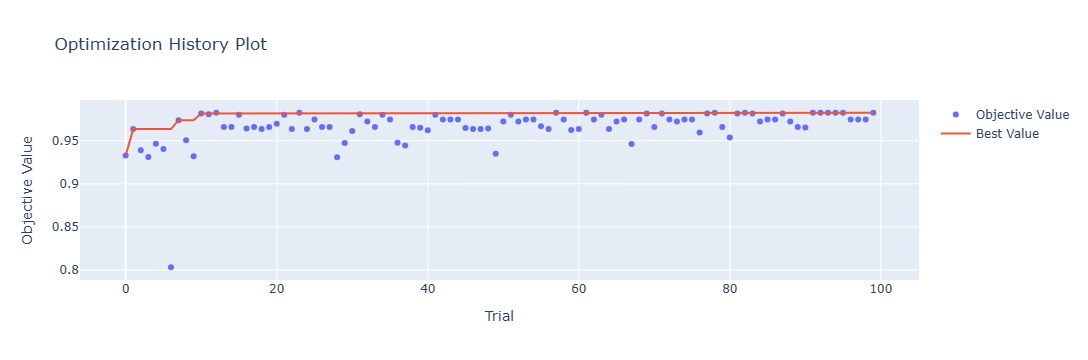

In [195]:
from optuna.visualization import plot_param_importances,plot_optimization_history
plot_optimization_history(study)

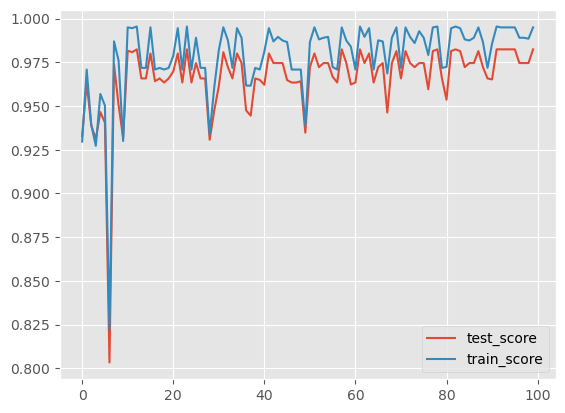

In [203]:
plt.plot(df["number"],df["value"],label="test_score")
plt.plot(df["number"],df["user_attrs_training score"],label="train_score")
plt.legend()
plt.show()

#### 6.5 Training the model with the best Hyperparameters

- After performing hyperparameter tuning with Optuna, we can identify the best values for our model's hyperparameters. Using these optimized values, we can train our model to achieve a balance between overfitting and underfitting.

In [205]:
rf = RandomForestClassifier(
        n_estimators= 119,
        max_depth= 20,
        max_features= None,
        min_samples_split= 15,
        min_impurity_decrease= 0.0101,
        class_weight="balanced",  
        random_state=42
)

In [207]:
rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=None,
                       min_impurity_decrease=0.0101, min_samples_split=15,
                       n_estimators=119, random_state=42)

## 7. Testing

- After training the model with the best hyperparameters obtained from Optuna, we evaluate its performance using the test dataset (X_test). This step helps us assess how well the model generalizes to unseen data.

- By testing on X_test, we can measure key metrics such as recall, precision, F1-score, and ensure the model is neither overfitting nor underfitting

In [209]:
y_cap = rf.predict(x_test)

#### 7.1 Testing with various classification performance metrics.

In [211]:
recall_score(y_test,y_cap,average = "weighted")

0.9844357976653697

In [213]:
precision_score(y_test,y_cap,average = "weighted")

0.98504769674909

In [215]:
f1_score(y_test,y_cap,average = "weighted")

0.9844985085236524

In [217]:
confusion_matrix(y_test,y_cap)

array([[60,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1, 33,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  7,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 62,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 10,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 19]], dtype=int64)

In [219]:
print(classification_report(y_test,y_cap))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        61
           1       1.00      0.94      0.97        35
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       0.98      0.98      0.98        57
           6       1.00      1.00      1.00        62
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        19

    accuracy                           0.98       257
   macro avg       0.98      0.99      0.98       257
weighted avg       0.99      0.98      0.98       257

